# Dataset preprocessing

### Basic information

The goal of this project is to recommend the most similar players as substitution for a given player. We have a dataset of players with a lot of information about them. In order to use this dataset effectively, we need to carefully analyse it and see what kind of information we have at our disposal.

In [1]:
import pandas as pd
import numpy as np
dataset = pd.read_csv('data.csv', delimiter=',')

In [2]:
dataset.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
dataset.tail()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K
18206,18206,246269,G. Nugent,16,https://cdn.sofifa.org/players/4/19/246269.png,England,https://cdn.sofifa.org/flags/14.png,46,66,Tranmere Rovers,...,43.0,40.0,43.0,50.0,10.0,15.0,9.0,12.0,9.0,€165K


In [4]:
dataset.sample(10)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
680,680,186148,R. Zieler,29,https://cdn.sofifa.org/players/4/19/186148.png,Germany,https://cdn.sofifa.org/flags/21.png,79,80,VfB Stuttgart,...,61.0,20.0,12.0,13.0,75.0,76.0,70.0,79.0,81.0,€17.8M
4232,4232,231507,A. Soto,24,https://cdn.sofifa.org/players/4/19/231507.png,Argentina,https://cdn.sofifa.org/flags/52.png,71,75,Racing Club,...,61.0,71.0,72.0,73.0,12.0,5.0,6.0,7.0,14.0,€4M
1947,1947,232119,C. Söyüncü,22,https://cdn.sofifa.org/players/4/19/232119.png,Turkey,https://cdn.sofifa.org/flags/48.png,75,83,Leicester City,...,59.0,69.0,84.0,80.0,6.0,7.0,7.0,7.0,7.0,€17.9M
12825,12825,221633,B. Sørmo,21,https://cdn.sofifa.org/players/4/19/221633.png,Norway,https://cdn.sofifa.org/flags/36.png,63,71,Kristiansund BK,...,43.0,56.0,66.0,62.0,13.0,10.0,14.0,14.0,13.0,€689K
15276,15276,242933,J. Caraballo,22,https://cdn.sofifa.org/players/4/19/242933.png,Venezuela,https://cdn.sofifa.org/flags/61.png,60,69,CD Huachipato,...,58.0,35.0,35.0,31.0,5.0,9.0,15.0,8.0,15.0,€504K
10696,10696,221631,M. Lundemo,24,https://cdn.sofifa.org/players/4/19/221631.png,Norway,https://cdn.sofifa.org/flags/36.png,65,72,Rosenborg BK,...,61.0,57.0,56.0,49.0,6.0,7.0,9.0,10.0,11.0,€1.1M
7992,7992,184142,Marco Soares,34,https://cdn.sofifa.org/players/4/19/184142.png,Cape Verde,https://cdn.sofifa.org/flags/104.png,67,67,CD Feirense,...,67.0,55.0,68.0,61.0,8.0,12.0,16.0,10.0,9.0,€483K
3459,3459,234832,K. Pedersen,23,https://cdn.sofifa.org/players/4/19/234832.png,Denmark,https://cdn.sofifa.org/flags/13.png,72,77,Birmingham City,...,61.0,71.0,74.0,68.0,6.0,7.0,7.0,15.0,14.0,€6.8M
3704,3704,233119,M. Olunga,24,https://cdn.sofifa.org/players/4/19/233119.png,Kenya,https://cdn.sofifa.org/flags/120.png,72,79,Kashiwa Reysol,...,65.0,23.0,18.0,13.0,5.0,8.0,10.0,14.0,8.0,€6.4M
11061,11061,200210,A. Sarcevic,26,https://cdn.sofifa.org/players/4/19/200210.png,England,https://cdn.sofifa.org/flags/14.png,64,66,Plymouth Argyle,...,63.0,60.0,56.0,50.0,16.0,11.0,13.0,8.0,16.0,€958K


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

In [6]:
dataset.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


First of all, obviously irrelevant columns should be dropped:

In [7]:
dataset = dataset.drop(['Unnamed: 0', 'ID', 'Photo', 'Flag', 'Club Logo', 'Real Face', 'Jersey Number',
                        'Joined', 'Loaned From', 'Contract Valid Until'], axis=1)

Jersey numbers were originally used to indicate position, with starting players being assigned numbers 1–11, although these numbers often bear little or no significance in the modern game other than the players' favourite numbers and the numbers available. Besides that, players' position is already contained in Position column, so Jersey Number column can be removed without losing any information.

### Missing values analysis

In [8]:
print('Missing club info: ', dataset.Club.isnull().sum())

Missing club info:  241


241 players have no information about their current club. They could be free agents, or it's just missing information. Either way, that's not a big problem, because we will not use club as relevant factor for determining the similarity of players. We could potentially use club only for help in filling some missing values if necessary. The reason we are dissmising club information is abundance of other data that is actually more relevant, which makes club information redundant. But if we didn't have so much information about every aspect of players quality, we might use club as approximate indicator of that player. For example, if it's FC Barcelona player, we could assume he is pretty good and we could replace some of his missing values with average rating of FC Barcelona. The same holds for nationality, so these two columns will be dropped:

In [9]:
dataset = dataset.drop(['Club', 'Nationality'], axis=1)

Next, we see that columns 'Weight', 'Height', 'Preferred Foot', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type' have the same number of null values. It's likely that the same players are missing all of these values. We can check this in many different ways, and it turns out to be correct. Since these 48 players are missing a lot of values, and there's not too many of them, we can drop these records:

In [10]:
dataset = dataset.dropna(subset = ['Preferred Foot'])

Now we can check how many records are left with missing Position value:

In [11]:
print('Position null values: ', len(dataset[dataset.Position.isnull()]))

Position null values:  12


Since it's a really small number, we can drop these too:

In [12]:
dataset = dataset.dropna(subset = ['Position'])

We notice that columns representing players' skills for each position in the field have about 2000 null values. Looking at first few such records, we realize they are all goalkeepers. We check if the rest of them are goalkeepers too:

In [13]:
print(dataset[dataset.LS.isnull()]['Position'].value_counts())
print(dataset[dataset.CM.isnull()]['Position'].value_counts())
print(dataset[dataset.LB.isnull()]['Position'].value_counts())

GK    2025
Name: Position, dtype: int64
GK    2025
Name: Position, dtype: int64
GK    2025
Name: Position, dtype: int64


From this and more manual inspection we conclude that ratings for different positions on the pitch are available for every player, except for goalkeepers. For goalkeepers that rating is not relevant and it actually can't exist, because goalkeepers never play in any other position.

The last column that has missing values is Release Clause column. Release clause is usually set to some unrealistic high value and it usually doesn't reflect players real value. Value column gives much better information about that and having both of these could be redundant and confusing for algorithm. So we will decide to keep the value column and drop Release Clause:

In [14]:
dataset = dataset.drop(['Release Clause'], axis=1)

### Handling non-numerical data

Let's look at the Value and Wage columns:

In [15]:
dataset[['Value', 'Wage']].sample(20)

,Value,Wage
2315,€1.8M,€4K
15388,€250K,€1K
3228,€1.4M,€3K
10208,€550K,€2K
11097,€725K,€3K
15793,€300K,€1K
17777,€110K,€1K
11818,€500K,€5K
12506,€80K,€2K
13844,€425K,€2K


The only thing we have to do here is to get rid of characters €, M and K and we get numerical values:

In [16]:
def convert_value(value):
    """Convert value unit to millions"""
    if 'K' in value:
        return round(float(value.replace('K', ''))/1000, 3)
    else:
        return value

dataset.Value = dataset.Value.str.replace('€', '').str.replace('M', '')
dataset.Value = dataset.Value.apply(convert_value)
dataset.Wage = dataset.Wage.str.replace('€', '').str.replace('K', '')
dataset[['Value', 'Wage']].sample(5)

,Value,Wage
11225,0.525,3
6813,0.95,6
7137,0.975,2
4298,0,0
12651,0.325,1


Next, we have to convert categorical attribute Preferred Foot. We can quickly check which different values can this attribute have to make sure no unexpected values go unnoticed:

In [17]:
print('Preferred Foot: ', np.unique(dataset['Preferred Foot'].values))

Preferred Foot:  ['Left' 'Right']


Now we can substitute 'Left' with 0 and 'Right' with 1:

In [18]:
foot_ord_map = {'Left': 0, 'Right': 1}
dataset["Preferred Foot"] = dataset["Preferred Foot"].map(foot_ord_map)
dataset[["Preferred Foot"]].sample(5)

,Preferred Foot
16449,1
9737,1
9893,0
9065,1
4758,1


Now let's examine Work Rate column:

In [19]:
print('Work rate: ', np.unique(dataset['Work Rate'].values))

Work rate:  ['High/ High' 'High/ Low' 'High/ Medium' 'Low/ High' 'Low/ Low'
 'Low/ Medium' 'Medium/ High' 'Medium/ Low' 'Medium/ Medium']


This column has information about how hard working player is in the attack/defense. There are 3 possible values: Low, Medium and High. We could split this column in two features: Attack Work Rate and Defense Work Rate. Each of these could take 3 values: 0 (Low), 1 (Medium), 2 (High):

In [20]:
sub = dataset['Work Rate'].str.split('/ ', expand=True)
dataset[["Att work rate", "Def work rate"]] = sub
wr_ord_map = {'Low': 0, 'Medium': 1, 'High': 2}
dataset['Att work rate'] = dataset['Att work rate'].map(wr_ord_map)
dataset['Def work rate'] = dataset['Def work rate'].map(wr_ord_map)
dataset[['Att work rate', 'Def work rate']].sample(5)
dataset = dataset.drop(['Work Rate'], axis=1)

Now let's examine Body Type column and what kind of different values it contains:

In [21]:
print('Body Type: ', np.unique(dataset['Body Type'].values))

Body Type:  ['Akinfenwa' 'C. Ronaldo' 'Courtois' 'Lean' 'Messi' 'Neymar' 'Normal'
 'PLAYER_BODY_TYPE_25' 'Shaqiri' 'Stocky']


There are only three options for body type, with few exceptions. Body type can be: Lean, Normal and Stocky. Special body types were made for only few exceptional players, for better gaming experience. Since all of these players are well-known, we can manually replace their body type with some regular type. For example, we could say that Courtois, Messi and Neymar belong to Lean category. Ronaldo could be Normal, and Shaqiri and Akinfenwa are Stocky. PLAYER_BODY_TYPE_25 belongs to Mohamed Salah, so we could replace that with Lean. We could even remove these players from dataset, but since they are famous they are worth some extra work just for fun:

In [22]:
def replace_special_body_types(body_type):
    special_types = ['Akinfenwa', 'Shaqiri', 'C. Ronaldo', 'Courtois', 'Messi', 'Neymar', 'PLAYER_BODY_TYPE_25']
    replacement = ['Stocky', 'Stocky', 'Normal', 'Lean', 'Lean', 'Lean', 'Lean']

    if body_type not in special_types:
        return body_type
    else:
        return replacement[special_types.index(body_type)]
    
dataset['Body Type'] = dataset['Body Type'].apply(replace_special_body_types)

Next non-numerical feature is Position, so let's see what different positions are there:

In [23]:
print('Position: ', np.unique(dataset['Position'].values.tolist()))

Position:  ['CAM' 'CB' 'CDM' 'CF' 'CM' 'GK' 'LAM' 'LB' 'LCB' 'LCM' 'LDM' 'LF' 'LM'
 'LS' 'LW' 'LWB' 'RAM' 'RB' 'RCB' 'RCM' 'RDM' 'RF' 'RM' 'RS' 'RW' 'RWB'
 'ST']


There are 27 different positions including goalkeeper, which will be replaced with categorical numerical values from  Also, we will replace null values for positions for goalkeepers, before we make modifications to this column:

In [24]:
# Replacing goalkeeper null values with zeroes before modifying Position column
dataset[dataset.Position == 'GK'] = dataset[dataset.Position == 'GK'].fillna(0)

position_map = {'GK': 0, 'CB': 1, 'LCB': 1, 'RCB': 1, 'LB': 2, 'LWB': 2, 'RB': 3, 'RWB': 3, 'CDM': 4,
                    'LDM': 4, 'RDM': 4, 'CM': 5, 'LCM': 5, 'RCM': 5, 'CAM': 6, 'LAM': 6, 'RAM': 6,
                    'LW': 7, 'LM': 7, 'RW': 8, 'RM': 8, 'CF': 9, 'RF': 9, 'LF': 9, 'ST': 10,
                    'RS': 10, 'LS': 10}

dataset.Position = dataset.Position.map(position_map)

Next non-numerical columns are Height and Weight:

In [25]:
dataset[['Height', 'Weight']].sample(20)

,Height,Weight
10757,5'10,181lbs
13463,5'9,168lbs
3064,5'8,154lbs
4222,5'7,146lbs
1877,6'2,192lbs
3817,5'7,146lbs
1374,6'2,174lbs
17057,6'1,159lbs
9077,6'0,179lbs
2035,6'2,170lbs


Height can be converted to centimeters for example and we will get numerical value. For weight it's enough just to remove 'lbs' for every record:

In [26]:
def height_to_cm(height):
    h_ft, h_inch = [float(i) for i in height.split('\'')]
    h_inch += h_ft * 12
    return round(h_inch * 2.54, 1)

dataset.Height = dataset.Height.apply(height_to_cm)
# Remove lbs from weight
dataset.Weight = dataset.Weight.apply(lambda x: x.replace('lbs', ''))

dataset[['Height', 'Weight']].sample(10)

,Height,Weight
1768,188.0,181
15924,182.9,154
10737,182.9,154
10770,190.5,183
1343,185.4,168
3267,177.8,161
14083,175.3,165
5180,188.0,179
5004,182.9,154
104,185.4,172


The only columns left with non-numerical values are ratings for different playing positions:

In [27]:
positions = ['CAM', 'CB', 'CDM', 'CF', 'CM', 'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW',
                     'LWB', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM', 'RS', 'RW', 'RWB', 'ST']

dataset[positions].sample(10)

,CAM,CB,CDM,CF,CM,LAM,LB,LCB,LCM,LDM,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
16284,55+2,33+2,39+2,56+2,49+2,55+2,40+2,33+2,49+2,39+2,...,40+2,33+2,49+2,39+2,56+2,56+2,54+2,57+2,43+2,54+2
3323,66+2,49+2,50+2,68+2,61+2,66+2,48+2,49+2,61+2,50+2,...,48+2,49+2,61+2,50+2,68+2,64+2,71+2,65+2,50+2,71+2
10174,64+2,51+2,55+2,63+2,61+2,64+2,55+2,51+2,61+2,55+2,...,55+2,51+2,61+2,55+2,63+2,63+2,59+2,63+2,56+2,59+2
17745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14125,50+2,60+2,56+2,48+2,52+2,50+2,58+2,60+2,52+2,56+2,...,58+2,60+2,52+2,56+2,48+2,51+2,46+2,50+2,57+2,46+2
2370,73+2,61+2,68+2,72+2,73+2,73+2,66+2,61+2,73+2,68+2,...,66+2,61+2,73+2,68+2,72+2,72+2,70+2,70+2,67+2,70+2
4637,66+2,46+2,49+2,67+2,61+2,66+2,44+2,46+2,61+2,49+2,...,44+2,46+2,61+2,49+2,67+2,62+2,70+2,64+2,47+2,70+2
10516,63+2,61+2,64+2,62+2,64+2,63+2,64+2,61+2,64+2,64+2,...,64+2,61+2,64+2,64+2,62+2,65+2,59+2,64+2,65+2,59+2
549,79+3,76+3,81+3,77+3,81+3,79+3,78+3,76+3,81+3,81+3,...,78+3,76+3,81+3,81+3,77+3,78+3,74+3,77+3,79+3,74+3
8948,48+2,65+2,60+2,47+2,52+2,48+2,59+2,65+2,52+2,60+2,...,59+2,65+2,52+2,60+2,47+2,49+2,48+2,46+2,57+2,48+2


We can remove everything after + sign, because almost all of the players are either +2 or +3. It doesn't make much of a difference. After we get rid of this, we will have clean numerical values:

In [28]:
def rating_to_number(rating):
    rating = str(rating)
    if not isinstance(rating, int):
        return rating.split('+')[0]
    else:
        return 0

for pos in positions:
    dataset[pos] = dataset[pos].apply(rating_to_number)
    
dataset[positions].sample(10)

,CAM,CB,CDM,CF,CM,LAM,LB,LCB,LCM,LDM,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
12631,49,61,55,50,49,49,61,61,49,55,...,61,61,49,55,50,52,48,52,60,48
15768,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13342,55,53,52,58,53,55,52,53,53,52,...,52,53,53,52,58,55,61,56,53,61
15188,58,52,56,58,58,58,56,52,58,56,...,56,52,58,56,58,59,57,58,57,57
4370,69,57,62,68,67,69,59,57,67,62,...,59,57,67,62,68,68,64,68,61,64
4128,69,65,69,68,70,69,68,65,70,69,...,68,65,70,69,68,70,65,69,70,65
10758,65,61,63,65,64,65,63,61,64,63,...,63,61,64,63,65,66,63,66,64,63
5693,67,43,49,67,62,67,52,43,62,49,...,52,43,62,49,67,67,66,68,54,66
6246,68,52,56,67,65,68,55,52,65,56,...,55,52,65,56,67,68,66,68,58,66
6298,64,62,65,63,64,64,67,62,64,65,...,67,62,64,65,63,67,58,65,68,58


### Data normalization

Since certain groups of columns are in different value ranges, they must be scaled properly.

In [29]:
from collections import Counter
import matplotlib.pyplot as plt

def plot_distribution(values, xlabel, ylabel, x, convert_to_int=True):
    
    if convert_to_int == True:
        values = [int(round(float(i))) for i in values]
    else:
        values = [round(float(i),3) for i in values]
    values.sort()
    
    values_count = Counter(values)
    distinct_values = list(dict.fromkeys(values))
    values_count = [ values_count[i] for i in distinct_values ]
    
    xticks = []

    for i in range(0,len(distinct_values)):

        if(i % x == 0):
            xticks.append(distinct_values[i])
        else:
            xticks.append('')
            
    plot = plt.bar(distinct_values, values_count)
    plt.xticks(distinct_values, xticks)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()

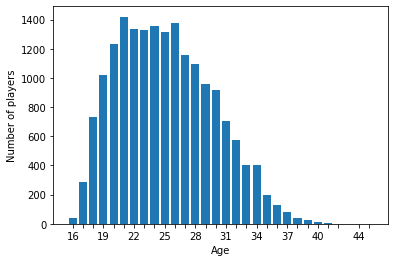

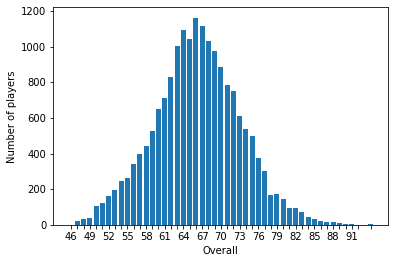

In [30]:
plot_distribution(dataset.Age.tolist(), 'Age', 'Number of players', 3)
plot_distribution(dataset.Overall.tolist(), 'Overall', 'Number of players', 3)

Most of these columns have normal distribution as expected. We can scale all of these columns to get all features on the same scale:

In [31]:
from sklearn.preprocessing import MinMaxScaler

columns_to_skip_scaling = ['Name', 'Preferred Foot', 'Body Type', 'Att work rate', 'Def work rate', 'Position']

columns = []

for col in dataset.columns:
    if col not in columns_to_skip_scaling:
        columns.append(col)

scaler = MinMaxScaler()
scaler.fit(dataset[columns])

dataset[columns] = scaler.transform(dataset[columns])

In [32]:
dataset.sample(10)

,Name,Age,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Att work rate,Def work rate
7835,Kwon Kyung Won,0.344828,0.437500,0.489362,0.006962,0.012389,0.562229,0,0.0,0.50,...,0.692308,0.736264,0.715909,0.157303,0.131868,0.144444,0.146067,0.096774,0,2
15335,S. Matthews,0.172414,0.270833,0.404255,0.001941,0.001770,0.552941,0,0.0,0.25,...,0.406593,0.560440,0.579545,0.146067,0.076923,0.144444,0.168539,0.064516,2,1
2489,O. Gladkyi,0.482759,0.583333,0.553191,0.046414,0.026549,0.634056,1,0.0,0.75,...,0.186813,0.230769,0.215909,0.134831,0.164835,0.055556,0.123596,0.096774,1,1
17507,K. Ackermann,0.034483,0.166667,0.574468,0.001266,0.001770,0.486068,1,0.0,0.50,...,0.472527,0.571429,0.488636,0.123596,0.065934,0.111111,0.067416,0.129032,1,1
1654,T. Arslan,0.379310,0.604167,0.595745,0.054852,0.067257,0.817957,1,0.0,0.75,...,0.714286,0.791209,0.750000,0.056180,0.109890,0.100000,0.056180,0.053763,1,1
4934,L. Baker,0.241379,0.500000,0.638298,0.021941,0.035398,0.729412,1,0.0,1.00,...,0.505495,0.571429,0.477273,0.078652,0.153846,0.122222,0.078652,0.053763,1,0
1303,C. Hérelle,0.310345,0.625000,0.680851,0.071730,0.046018,0.668111,1,0.0,0.50,...,0.791209,0.835165,0.829545,0.157303,0.098901,0.144444,0.123596,0.129032,1,1
7808,A. Calello,0.517241,0.437500,0.404255,0.004430,0.008850,0.572136,1,0.0,0.50,...,0.692308,0.780220,0.715909,0.123596,0.153846,0.066667,0.134831,0.086022,1,2
14188,N. Atangana,0.413793,0.312500,0.276596,0.002110,0.005310,0.602477,1,0.0,0.50,...,0.560440,0.681319,0.659091,0.146067,0.120879,0.144444,0.157303,0.139785,1,2
15544,M. Hamrol,0.275862,0.270833,0.361702,0.001350,0.001770,0.050155,0,0.0,0.50,...,0.076923,0.098901,0.102273,0.662921,0.626374,0.522222,0.640449,0.645161,1,1


As we can see, all of our columns are now scaled to the same value range.

### Prediction

Last thing to do is to decide what kind of metric should we use for determining the similarity of players. We will go with Euclidean distance. Since k-nearest neighbors classifiers uses this metric by default, we could use it to get for example 10 nearest players according to their ratings from dataset:

In [36]:
from sklearn.neighbors import KNeighborsClassifier

processed_data = pd.read_csv('../data/processed/processed_dataset.csv', delimiter=',')


def recommend_substitution(name):
    neigh = KNeighborsClassifier(n_neighbors=11)

    test = processed_data[(processed_data.Name == name)]
    same_position_players = processed_data[processed_data.Position == test.Position.iloc[0]]
    neigh.fit(same_position_players.drop(['Name', 'Value'], axis=1), same_position_players['Body Type'])
    res = neigh.kneighbors(test.drop(['Name', 'Value'], axis=1))

    for i in res[1]:
        players = same_position_players.iloc[i].Name
        players = players[players.map(lambda x: x != name)]

        for j in range(0, len(players)):
            print(j+1, ':', players.iloc[j])

Now we can check the results and see if they make any sense:

In [37]:
recommend_substitution('L. Messi')

1 : G. Bale
2 : P. Dybala
3 : E. Hazard
4 : L. Suárez
5 : R. Lewandowski
6 : Rodrigo
7 : A. Milik
8 : Cristiano Ronaldo
9 : R. Mahrez
10 : G. Higuaín


In [38]:
recommend_substitution('De Gea')

1 : W. Szczęsny
2 : M. Perin
3 : M. Neuer
4 : M. ter Stegen
5 : T. Courtois
6 : Neto
7 : K. Navas
8 : J. Oblak
9 : L. Hrádecký
10 : G. Buffon


In [39]:
recommend_substitution('V. van Dijk')

1 : T. Alderweireld
2 : David Luiz
3 : M. de Ligt
4 : O. Toprak
5 : Josué Chiamulera
6 : B. Höwedes
7 : M. Musacchio
8 : S. Coates
9 : E. Garay
10 : J. Tarkowski


In [40]:
recommend_substitution('Neymar Jr')

1 : K. Mbappé
2 : M. Reus
3 : S. Mané
4 : R. Sterling
5 : Y. Carrasco
6 : M. Salah
7 : L. Insigne
8 : Isco
9 : Gelson Martins
10 : H. Son


All of these are reasonable suggestions, which is a good indicator that feature engineering process was good.